In [1]:
import pandas as pd

df_all = pd.read_csv("../data/BuildingDataset/all.csv")

In [2]:
df_all = df_all.dropna()
df_all

,f1,f2,vol.build,vol.min,vol.max,vol.mean,vol.med,vol.range,vol.std,vol.gini,...,long_short.min,long_short.max,long_short.mean,long_short.med,long_short.range,long_short.std,long_short.gini,meanheight.build,meanheight_height.build,height_soil.build
1,389664.0,681.010,299.898,9.49611,264.209,99.9660,26.1931,254.71300,116.33700,0.566221,...,0.576531,0.916360,0.803084,0.916360,0.339829,0.160197,0.094035,6.47268,0.676846,0.206398
2,1732610.0,849.511,299.779,61.64700,173.546,99.9262,64.5855,111.89900,52.07100,0.248848,...,0.880911,0.920836,0.906950,0.919103,0.039925,0.018426,0.009783,9.29326,0.524066,0.549730
3,729853.0,652.527,299.944,38.34540,204.048,99.9812,57.5505,165.70200,74.00260,0.368296,...,0.504456,0.689910,0.617374,0.657757,0.185454,0.080917,0.066754,3.90003,0.602600,0.084152
4,2629310.0,786.246,299.862,22.43900,246.035,99.9541,31.3882,223.59600,103.35900,0.497108,...,0.618281,0.738355,0.658306,0.618281,0.120073,0.056603,0.040533,23.62600,1.000000,1.861480
5,160481.0,724.934,299.872,61.40950,138.446,99.9572,100.0160,77.03650,31.45000,0.171265,...,0.516423,0.764904,0.601795,0.524058,0.248481,0.115378,0.091756,6.74065,0.613009,0.247173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806535,47604.7,616.405,299.777,96.51890,106.457,99.9257,96.8008,9.93844,4.62000,0.022102,...,0.595973,0.710863,0.634504,0.596675,0.114890,0.053995,0.040238,6.87300,1.000000,0.157578
806536,44894.5,621.087,299.727,95.76710,107.852,99.9090,96.1084,12.08450,5.61797,0.026879,...,0.611747,0.692706,0.639015,0.612591,0.080959,0.037967,0.028154,7.69200,1.000000,0.197402
806537,44133.2,629.523,299.865,96.76050,104.488,99.9550,98.6168,7.72726,3.29350,0.017179,...,0.574575,0.664278,0.606022,0.579213,0.089704,0.041237,0.032893,8.25000,1.000000,0.226977
806538,45486.5,620.729,299.780,93.97260,106.211,99.9265,99.5961,12.23830,5.00171,0.027216,...,0.628496,0.676765,0.649074,0.641962,0.048269,0.020337,0.016526,7.42400,1.000000,0.183854


In [3]:
fs = df_all[["f1", "f2"]]
xs = df_all.drop(["f1", "f2"], axis=1)

print(f"fs shape = {fs.shape}")
print(f"xs shape = {xs.shape}")

fs shape = (801103, 2)
xs shape = (801103, 99)


<AxesSubplot: ylabel='Frequency'>

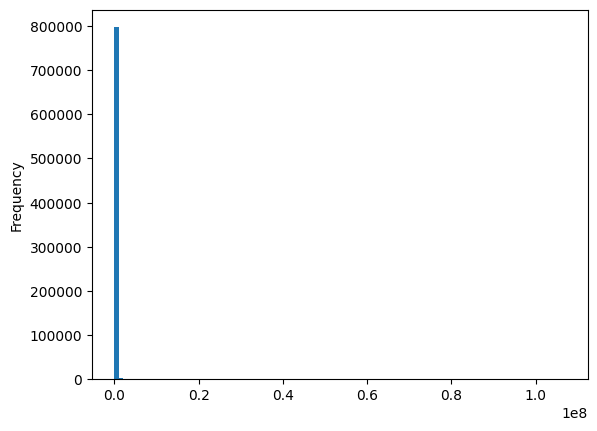

In [4]:
fs["f1"].plot(kind="hist", bins=100)

<AxesSubplot: ylabel='Frequency'>

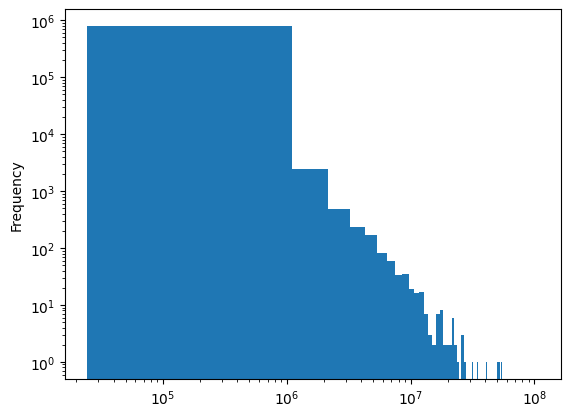

In [5]:
fs["f1"].plot(kind="hist", bins=100, logy=True, logx=True)

<AxesSubplot: ylabel='Frequency'>

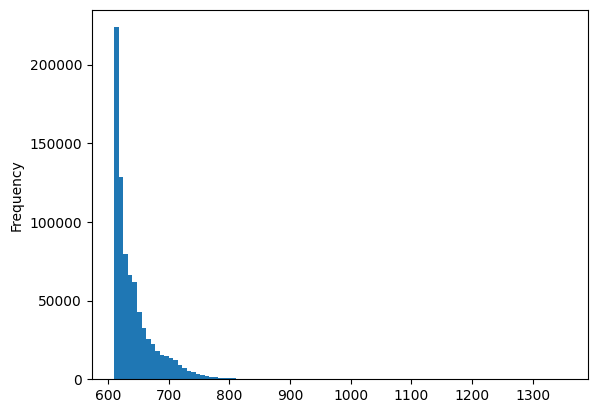

In [6]:
fs["f2"].plot(kind="hist", bins=100)

f1       AxesSubplot(0.125,0.11;0.352273x0.77)
f2    AxesSubplot(0.547727,0.11;0.352273x0.77)
dtype: object

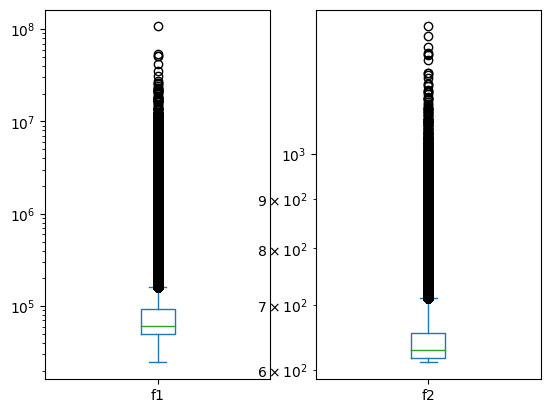

In [7]:
fs.plot(kind="box", logy=True, subplots=True)

In [8]:
ideal = fs.min(axis=0)
nadir = fs.max(axis=0)

print(f"ideal = {ideal.values}")
print(f"nadir = {nadir.values}")

ideal = [24468.5     610.657]
nadir = [1.07081e+08 1.35363e+03]


# Case 1

Suppose a decision maker is interested in the decision variables for solutions with objective values in a certain range of interest. We can use an explainable machine learning model to build an understanding of the features of the
decision variables that belong to solutions with objective values in the desired range.

Let us next define such a range:

In [9]:
import numpy as np

range_min = np.array([7e+4, 650])
range_max = np.array([8e+4, 700])

Next, we can label the data as follows:

1: the solution is in the desired objective value range.

0: the solution is not in the desired objective value range.

In [10]:
labels = np.array(np.all(fs > range_min, axis=1) & np.all(fs < range_max, axis=1), dtype=int)

## Rulefi classifier

In [ ]:
from imodels import SlipperClassifier

classifier = SlipperClassifier()

classifier.fit(X=xs, y=labels)